In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,14.0,131.0,162.0,84.0,67.0,0.0,14392.0,458.0,18.0,772.0,...,7117.0,13.0,363.0,759.0,0.0,358.0,0.0,3.0,44.0,1.0
2020-10-01,17.0,157.0,160.0,0.0,142.0,0.0,14001.0,491.0,13.0,873.0,...,6929.0,15.0,473.0,907.0,1.0,423.0,0.0,5.0,43.0,12.0
2020-10-02,5.0,159.0,157.0,60.0,97.0,5.0,14687.0,532.0,12.0,688.0,...,6994.0,36.0,264.0,791.0,1.0,444.0,0.0,1.0,28.0,8.0
2020-10-03,7.0,152.0,148.0,0.0,159.0,1.0,11129.0,543.0,14.0,1058.0,...,12885.0,25.0,784.0,826.0,0.0,312.0,0.0,1.0,144.0,27.0
2020-10-04,44.0,149.0,141.0,0.0,32.0,0.0,7668.0,571.0,13.0,714.0,...,22965.0,23.0,374.0,788.0,0.0,420.0,0.0,0.0,78.0,3.0


#### Countries with the biggest numbers of cases in the last day

In [34]:
df_daily_cases.tail().iloc[-1].nlargest(20)

Country/Region
India             74442.0
US                35504.0
United Kingdom    22965.0
Russia            10376.0
Brazil             8456.0
Argentina          7668.0
Colombia           6905.0
Ukraine            4263.0
Netherlands        4032.0
Indonesia          3992.0
Mexico             3712.0
Iran               3653.0
Iraq               3210.0
Philippines        3167.0
Oman               2685.0
Belgium            2612.0
Italy              2578.0
Israel             2332.0
Nepal              2253.0
Canada             2141.0
Name: 2020-10-04 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

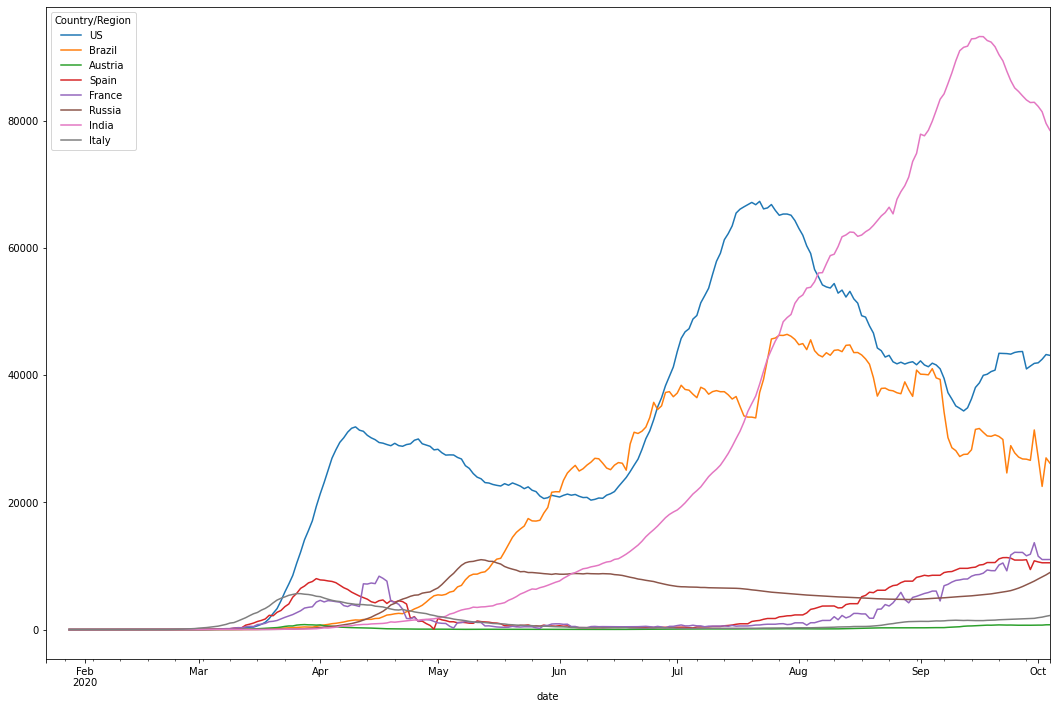

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

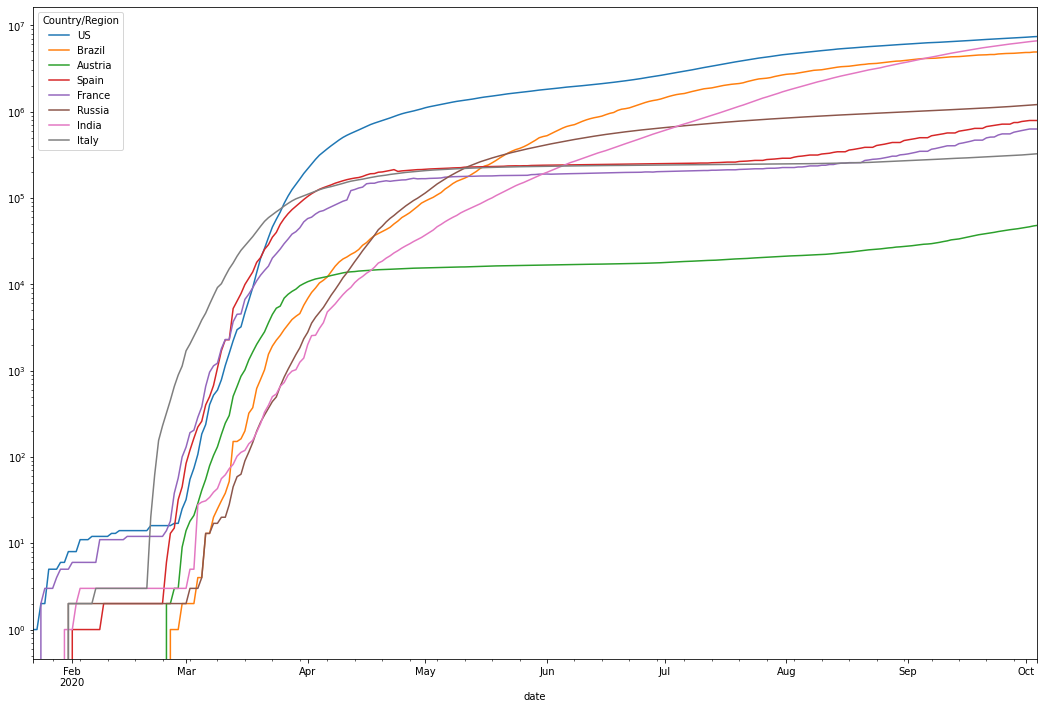

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,1458,387,1736,53,183,3,16937,959,888,799,...,42233,48,470,628,35,311,1,587,332,228
2020-10-01,1458,388,1741,53,185,3,20288,963,890,802,...,42292,48,471,635,35,318,1,587,333,228
2020-10-02,1458,389,1749,53,189,3,20599,966,893,803,...,42358,48,472,643,35,321,1,589,333,228
2020-10-03,1462,392,1756,53,193,3,20795,972,894,809,...,42407,48,477,649,35,329,1,589,333,228
2020-10-04,1462,396,1760,53,195,3,21018,977,894,813,...,42440,48,480,653,35,330,1,591,333,228


#### Countries with the biggest numbers of deaths in the last day

In [35]:
df_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                209721
Brazil            146352
India             102685
Mexico             79088
United Kingdom     42440
Italy              35986
Peru               32609
France             32171
Spain              32086
Iran               26957
Colombia           26712
Russia             21260
Argentina          21018
South Africa       16976
Chile              12979
Name: 2020-10-04 00:00:00, dtype: int64

In [10]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-09-30,946.0,1031.0,3.0,380.0,78.0,174.0,1181.0,19.0
2020-10-01,858.0,728.0,3.0,182.0,48.0,166.0,1095.0,24.0
2020-10-02,907.0,0.0,1.0,113.0,137.0,185.0,1069.0,23.0
2020-10-03,687.0,1307.0,6.0,0.0,0.0,172.0,940.0,27.0
2020-10-04,337.0,365.0,4.0,0.0,0.0,107.0,903.0,18.0


### New Deaths (moving average, 7 days)

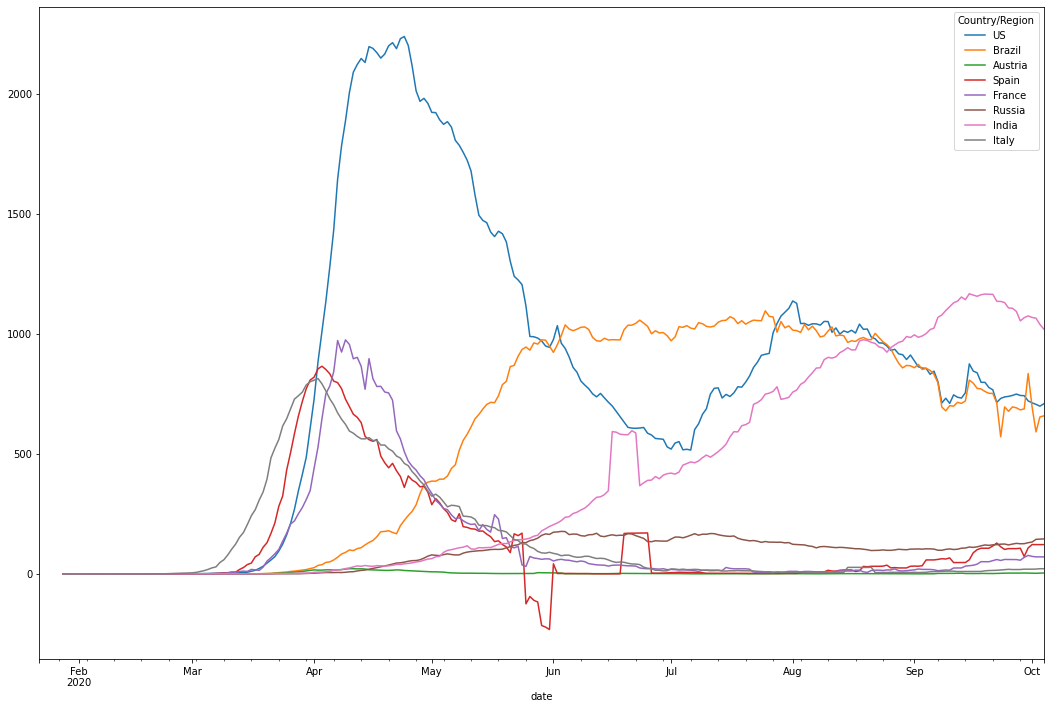

In [11]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

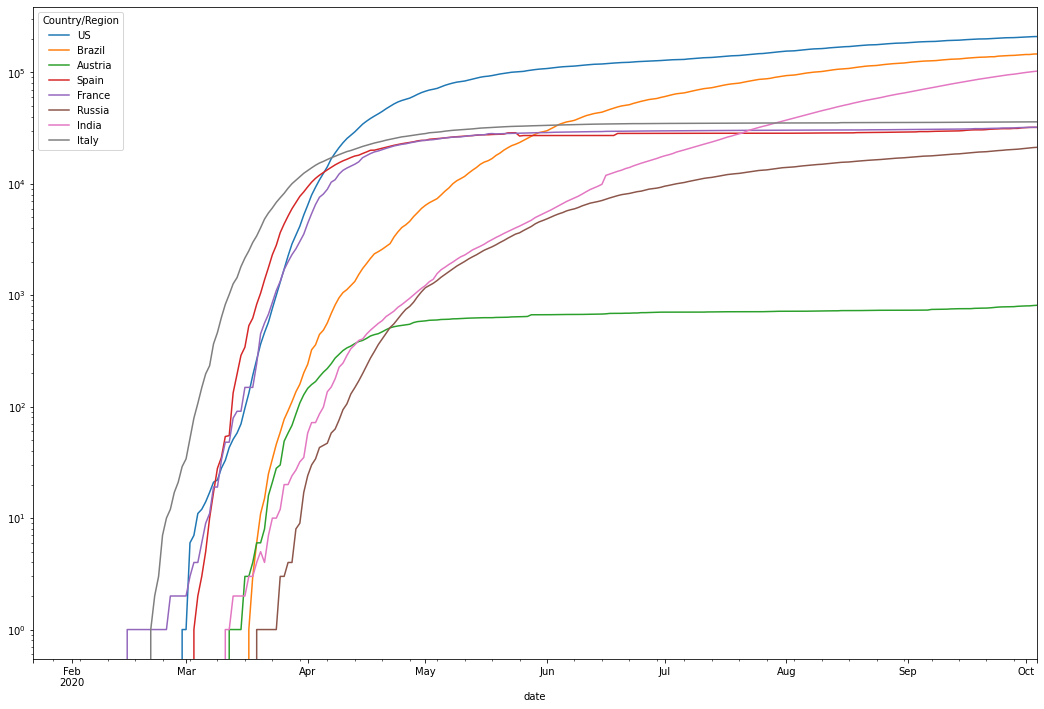

In [12]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [13]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-09-30,27383.0,37622.0,728.0,0.0,544.0,5803.0,85376.0,1198.0
2020-10-01,19962.0,24885.0,832.0,0.0,522.0,5941.0,78877.0,1140.0
2020-10-02,12719.0,0.0,710.0,0.0,1099.0,5995.0,75628.0,1126.0
2020-10-03,23953.0,61449.0,859.0,0.0,28.0,5525.0,82260.0,1247.0
2020-10-04,14377.0,14246.0,584.0,0.0,0.0,3239.0,76737.0,697.0


### New Recovered (moving average, 7 days)

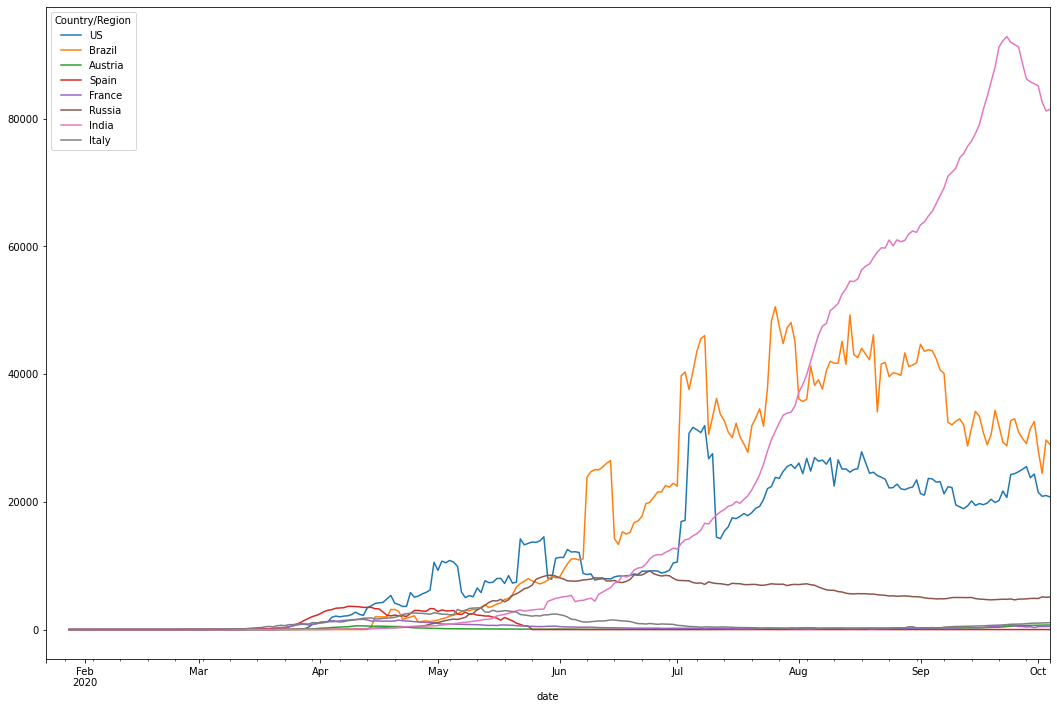

In [15]:
df_daily_recovered[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [16]:
df_recovered.loc["2020-02-23","Italy"] = 1

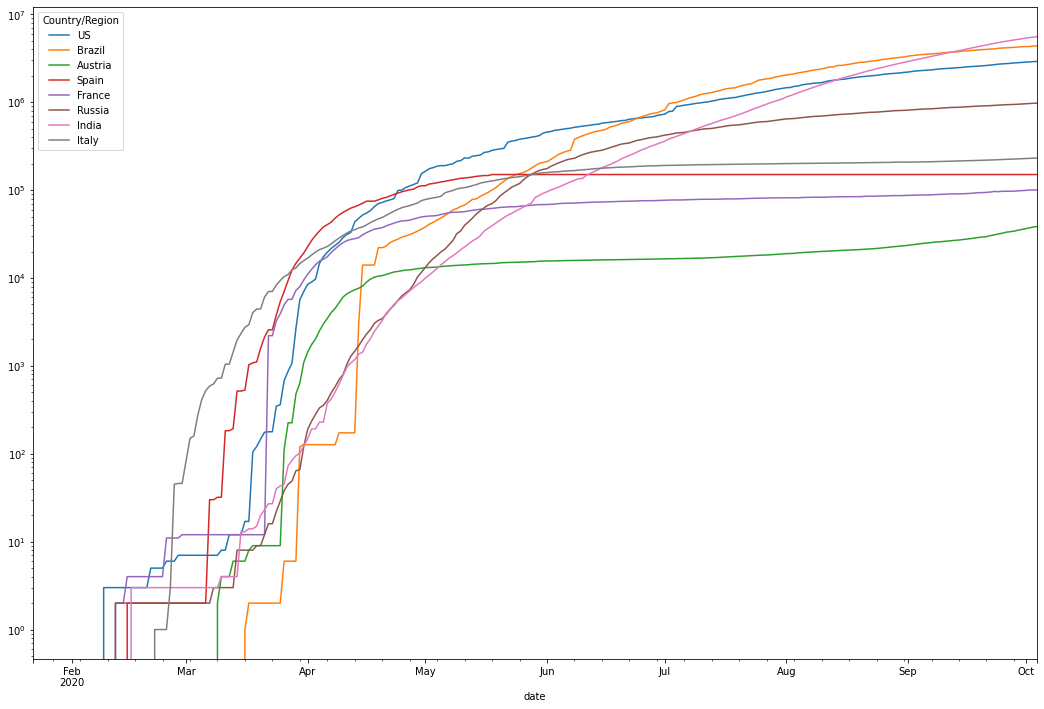

In [17]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [18]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [19]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [20]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [21]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [22]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [23]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [24]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [25]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [26]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [27]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [28]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [29]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                            "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [30]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

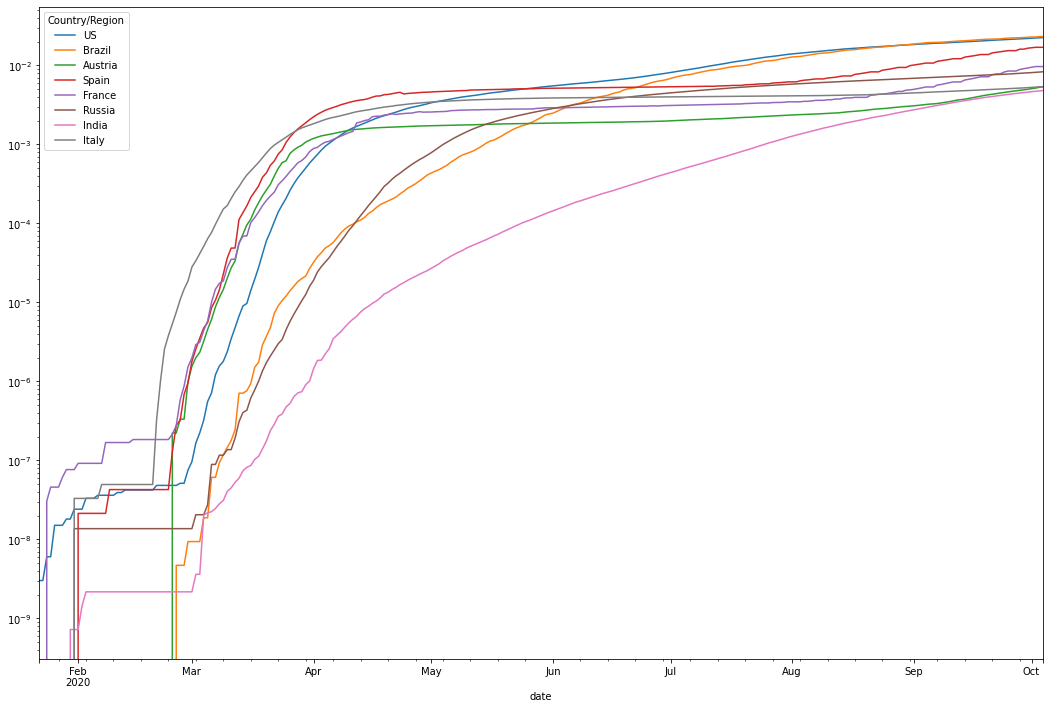

In [31]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

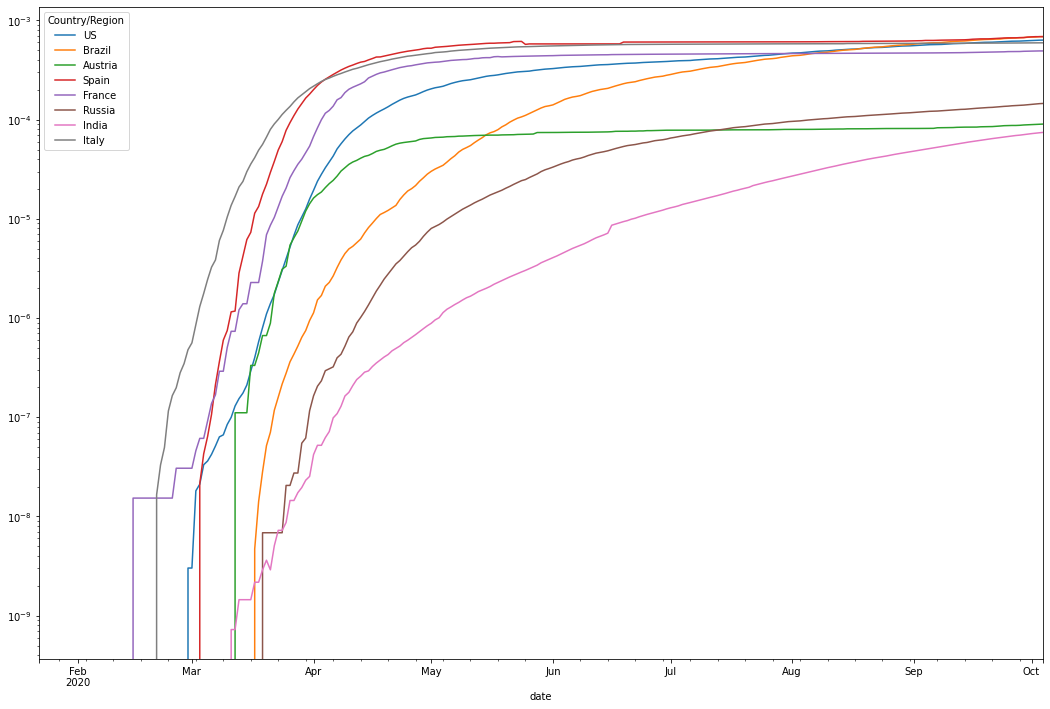

In [32]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

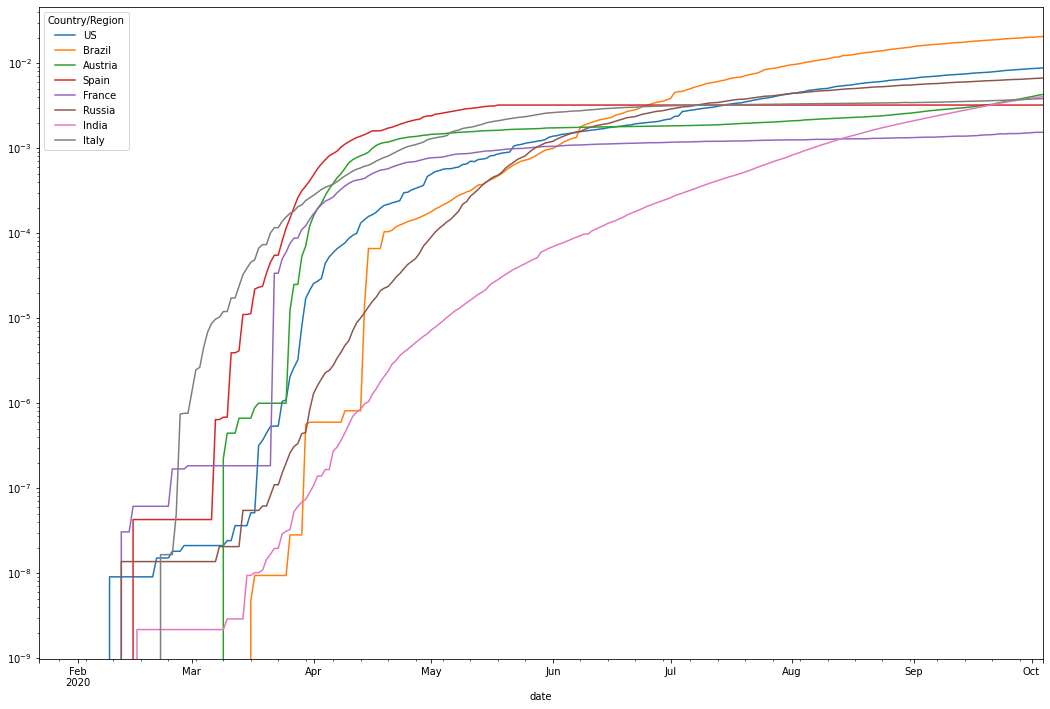

In [33]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

### Deaths / cases ratio

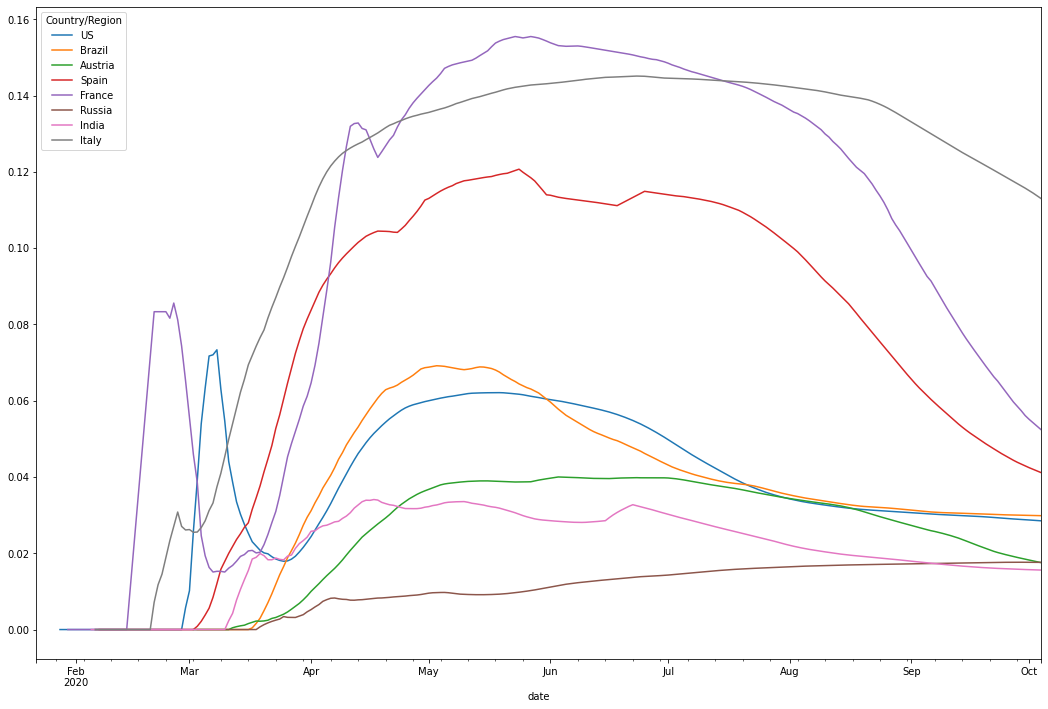

In [40]:
ratio = df_deaths/df_cases
ratio[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()